In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [4]:
# silence unessary warnings!
%matplotlib inline

In [5]:
df_train = pd.read_csv('data/train.csv')

In [6]:
df_train

,Train_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,60,RL,88.0,12128,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Abnorml,209000
1,2,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,254000
2,3,50,RL,120.0,17360,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,172500
3,4,20,RL,73.0,8688,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,232000
4,5,80,RL,88.0,15312,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,COD,Normal,148000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1566,60,RL,107.0,13641,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,492000
1566,1567,20,RL,90.0,11664,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,250000
1567,1568,80,RL,88.0,15400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,165000
1568,1569,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,143000


In [7]:
# iterating the columns 
for col in df_train.columns: 
    print(col) 


Train_ID
MS SubClass
MS Zoning
Lot Frontage
Lot Area
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Overall Qual
Overall Cond
Year Built
Year Remod/Add
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Type
Mas Vnr Area
Exter Qual
Exter Cond
Foundation
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
BsmtFin Type 2
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Heating
Heating QC
Central Air
Electrical
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Bsmt Full Bath
Bsmt Half Bath
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
Kitchen Qual
TotRms AbvGrd
Functional
Fireplaces
Fireplace Qu
Garage Type
Garage Yr Blt
Garage Finish
Garage Cars
Garage Area
Garage Qual
Garage Cond
Paved Drive
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Pool QC
Fence
Misc Feature
Misc Val
Mo Sold
Yr Sold
Sale Type
Sale Condition
SalePrice


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Train_ID         1570 non-null   int64  
 1   MS SubClass      1570 non-null   int64  
 2   MS Zoning        1570 non-null   object 
 3   Lot Frontage     1306 non-null   float64
 4   Lot Area         1570 non-null   int64  
 5   Street           1570 non-null   object 
 6   Alley            98 non-null     object 
 7   Lot Shape        1570 non-null   object 
 8   Land Contour     1570 non-null   object 
 9   Utilities        1570 non-null   object 
 10  Lot Config       1570 non-null   object 
 11  Land Slope       1570 non-null   object 
 12  Neighborhood     1570 non-null   object 
 13  Condition 1      1570 non-null   object 
 14  Condition 2      1570 non-null   object 
 15  Bldg Type        1570 non-null   object 
 16  House Style      1570 non-null   object 
 17  Overall Qual  

In [9]:
df_train["SalePrice"].describe()

count      1570.000000
mean     183176.052229
std       81524.931669
min       13100.000000
25%      131000.000000
50%      162500.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

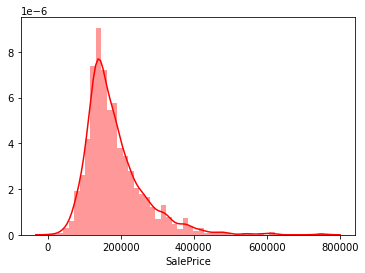

In [10]:
sns.distplot(df_train["SalePrice"],color='r')

<AxesSubplot:>

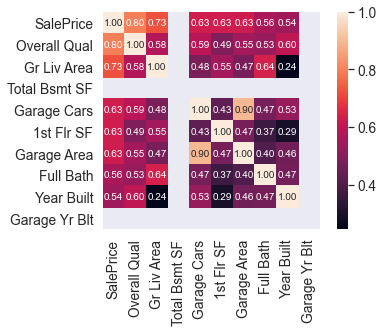

In [11]:
i = 10 
# i = 20
cols = df_train.corr().nlargest(i, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True,
           fmt='.2f', annot_kws={'size': 10},
         xticklabels=cols.values, yticklabels=cols.values )

<AxesSubplot:xlabel='SalePrice'>

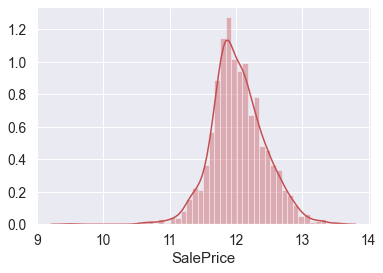

In [12]:
train_df = pd.read_csv("data/train.csv", index_col=0)
test_df = pd.read_csv("data/test.csv", index_col=0)
y_train = np.log1p(train_df.pop("SalePrice"))
sns.distplot(y_train, color='r')

(0.0, 800000.0)

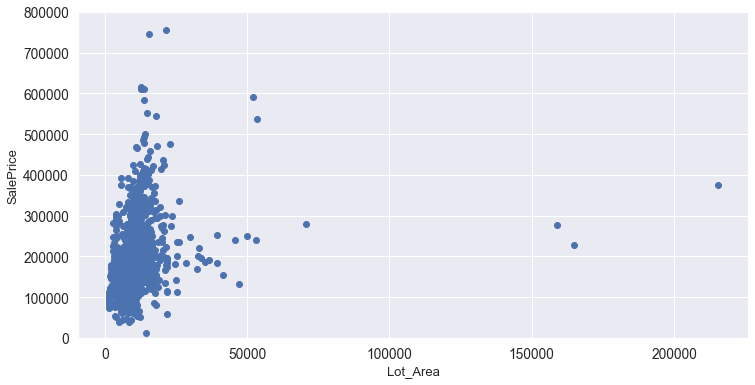

In [35]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]
plt.figure(figsize=(12,6))
plt.scatter(x=train["Lot_Area"], y=train.SalePrice)
plt.xlabel("Lot_Area", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)
    


In [49]:


train.drop(train[(train["Lot_Area"]>50000)&(train["SalePrice"]<400000)].index,inplace=True)
full=pd.concat([train,test], ignore_index=True)
full.drop(['Train_ID'],axis=1, inplace=True)
full.drop(['Test_ID'],axis=1, inplace=True)
full.shape
full.head()
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS_SubClass      2772 non-null   int64  
 1   MS_Zoning        2772 non-null   object 
 2   Lot_Frontage     2306 non-null   float64
 3   Lot_Area         2772 non-null   int64  
 4   Street           2772 non-null   object 
 5   Alley            189 non-null    object 
 6   Lot_Shape        2772 non-null   object 
 7   Land_Contour     2772 non-null   object 
 8   Utilities        2772 non-null   object 
 9   Lot_Config       2772 non-null   object 
 10  Land_Slope       2772 non-null   object 
 11  Neighborhood     2772 non-null   object 
 12  Condition_1      2772 non-null   object 
 13  Condition_2      2772 non-null   object 
 14  Bldg_Type        2772 non-null   object 
 15  House_Style      2772 non-null   object 
 16  Overall_Qual     2772 non-null   int64  
 17  Overall_Cond  

In [28]:
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

full.isnull().sum()[full.isnull().sum()>0]


Lot Frontage       466
Alley             2583
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           74
Bsmt Cond           74
Bsmt Exposure       77
BsmtFin Type 1      74
BsmtFin SF 1         1
BsmtFin Type 2      75
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1345
Garage Type        152
Garage Yr Blt      154
Garage Finish      154
Garage Cars          1
Garage Area          1
Garage Qual        154
Garage Cond        154
Pool QC           2760
Fence             2234
Misc Feature      2671
SalePrice         1210
dtype: int64

In [53]:
full.groupby(['Neighborhood'])[['Lot_Frontage']].agg(['mean','median','count'])

Lot_Frontage             
                     mean median count
Neighborhood                          
Blmngtn         46.900000   43.0    20
Blueste         28.125000   24.0     8
BrDale          21.500000   21.0    30
BrkSide         55.804598   51.0    87
ClearCr         89.526316   81.0    19
CollgCr         71.159420   70.0   207
Crawfor         69.256757   68.0    74
Edwards         67.463855   65.0   166
Gilbert         74.346154   63.5   104
Greens          41.000000   40.0     7
GrnHill               NaN    NaN     0
IDOTRR          62.512195   60.0    82
Landmrk               NaN    NaN     0
MeadowV         25.903226   21.0    31
Mitchel         74.694118   74.0    85
NAmes           75.150142   73.0   353
NPkVill         26.900000   24.0    20
NWAmes          81.512500   80.0    80
NoRidge         92.326923   89.0    52
NridgHt         84.909677   93.0   155
OldTown         61.922374   60.0   219
SWISU           59.261905   60.0    42
Sawyer          74.638298   72.0    94
SawyerW         70.610000   67.0   100
Somerst         64.743590   72.5   156
StoneBr         62.750000   60.5    44
Timber          79.836364   81.0    55
Veenker         72.000000   80.0    16

In [54]:
full["LotAreaCut"] = pd.qcut(full.Lot_Area,10)


full.groupby(['LotAreaCut'])[['Lot_Frontage']].agg(['mean','median','count'])
full['Lot_Frontage']=full.groupby(['LotAreaCut','Neighborhood'])['Lot_Frontage'].transform(lambda x: x.fillna(x.median()))

full['Lot_Frontage']=full.groupby(['LotAreaCut'])['Lot_Frontage'].transform(lambda x: x.fillna(x.median()))


/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [58]:
# handle missing values in basement, more information we
# can read from description
cols=[  
       "BsmtFin_SF_2", "Bsmt_Unf_SF", "Total_Bsmt_SF"
     ,"Full_Bath", "Half_Bath", "Fireplace_Qu"]
for col in cols:
    full[col].fillna(0, inplace=True)


cols1 = [ "Misc_Feature", "Alley", "Fence", "Fireplace_Qu", 
         "Garage_Qual", "Garage_Cond", "Garage_Finish", "Garage_Yr_Blt", 
         "Garage_Type", "Bsmt_Exposure", "Bsmt_Cond", "Bsmt_Qual", "BsmtFin_Type_2"
         , "BsmtFin_SF_1", "Mas_Vnr_Type"]
for col in cols1:
    full[col].fillna("None", inplace=True)

# fill in with mode
cols2 = ["MS_Zoning", "Bsmt_Full_Bath", "Bsmt_Half_Bath", "Utilities", "Functional", "Electrical", 
         "Kitchen_Qual", "Sale_Type","Exterior_1st", "Exterior_2nd"]
for col in cols2:
    full[col].fillna(full[col].mode()[0], inplace=True)

full.isnull().sum()[full.isnull().sum()>0]

Mas_Vnr_Area        22
BsmtFin_Type_1      74
Garage_Cars          1
Garage_Area          1
Pool_QC           2760
SalePrice         1210
dtype: int64

In [59]:
print('---Feature Engineering---')
    
NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath",
          "HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold",
          "YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    full[col]=full[col].astype(str)

---Feature Engineering---
